In [18]:
# Importing necessary libraries

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import Imputer
import sklearn
import pandas
import random
import matplotlib.pyplot as plt
%matplotlib inline  

In [19]:
# Reading in file 

raw_data = pandas.read_csv('contactid_08_01_18download.csv', encoding="utf-8")
#raw_data

# This will show us (# of rows, # of columns)
raw_data.shape

(18265, 36)

In [20]:
#raw_data

In [21]:
# updated_raw_data = pandas.read_csv('contactid_08_29_18.csv', encoding="utf-8")

# updated_raw_data.shape

In [22]:
updated_raw_data

,subjectid,scale,age,black,tot.child,health.sr,diag,shelter,recstay.yrs,ageinc,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
0,1003,4,31,0,1.0,1,0,0,2.115068,19.000000,...,NaN,NaN,NaN,NaN,NaN,32,1,17,1.0,4.0
1,1004,0,30,0,0.0,5,0,1,1.367123,27.000000,...,4.0,1.0,1.0,2.0,2.0,14,1,12,1.0,4.0
2,1005,5,26,0,0.0,1,0,0,1.210959,19.000000,...,0.0,1.0,0.0,NaN,NaN,1,0,0,NaN,NaN
3,1006,5,28,1,0.0,3,0,0,0.887671,21.000000,...,NaN,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN
4,1007,1,38,1,1.0,2,1,0,3.638356,21.000000,...,0.0,0.0,0.0,NaN,NaN,0,0,0,NaN,NaN
5,1101,5,22,1,1.0,3,0,0,2.057534,20.000000,...,0.0,0.0,0.0,22.0,22.0,0,0,0,NaN,NaN
6,1102,4,32,1,0.0,2,0,0,5.772603,26.000000,...,0.0,1.0,0.0,1.0,1.0,0,0,0,NaN,NaN
7,1103,3,33,1,0.0,4,0,0,13.375342,19.775343,...,1.0,1.0,1.0,NaN,NaN,0,0,0,NaN,NaN
8,1106,5,24,1,0.0,1,0,0,4.509589,19.512329,...,0.0,0.0,0.0,NaN,NaN,0,0,0,NaN,NaN
9,1107,4,33,1,2.0,2,0,0,2.953425,30.000000,...,NaN,NaN,NaN,NaN,NaN,2,0,0,12.0,12.0


In [23]:
updated_raw_data_filled = updated_raw_data.loc[updated_raw_data['Min days between calls'].fillna(0)]


    

In [24]:
updated_raw_data_filled

,subjectid,scale,age,black,tot.child,health.sr,diag,shelter,recstay.yrs,ageinc,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
0,1003,4,31,0,1.0,1,0,0,2.115068,19.0,...,NaN,NaN,NaN,NaN,NaN,32,1,17,1.0,4.0
2,1005,5,26,0,0.0,1,0,0,1.210959,19.0,...,0.0,1.0,0.0,NaN,NaN,1,0,0,NaN,NaN
0,1003,4,31,0,1.0,1,0,0,2.115068,19.0,...,NaN,NaN,NaN,NaN,NaN,32,1,17,1.0,4.0
0,1003,4,31,0,1.0,1,0,0,2.115068,19.0,...,NaN,NaN,NaN,NaN,NaN,32,1,17,1.0,4.0
0,1003,4,31,0,1.0,1,0,0,2.115068,19.0,...,NaN,NaN,NaN,NaN,NaN,32,1,17,1.0,4.0
22,1213,5,39,1,5.0,4,0,0,2.169863,22.0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,NaN,NaN
1,1004,0,30,0,0.0,5,0,1,1.367123,27.0,...,4.0,1.0,1.0,2.0,2.0,14,1,12,1.0,4.0
0,1003,4,31,0,1.0,1,0,0,2.115068,19.0,...,NaN,NaN,NaN,NaN,NaN,32,1,17,1.0,4.0
0,1003,4,31,0,1.0,1,0,0,2.115068,19.0,...,NaN,NaN,NaN,NaN,NaN,32,1,17,1.0,4.0
0,1003,4,31,0,1.0,1,0,0,2.115068,19.0,...,NaN,NaN,NaN,NaN,NaN,32,1,17,1.0,4.0


In [25]:
# We only want to consider data in which the "Close" column has data
# so that is the first thing we filter and we train/test on that new DataFrame

dfclean = updated_raw_data.loc[updated_raw_data['close'].notnull()]
#dfclean

# This will show us (# of rows, # of columns)
dfclean.shape

(2869, 57)

In [26]:
# Now we look over the workable data and see how clean it is

num_of_cells = dfclean.shape[0]*dfclean.shape[1]
num_of_cells

163533

In [27]:
# We look at all the columns with NaN values

df_null_columns = ((dfclean.isnull().sum()/dfclean.shape[0])*100).round(decimals=2).astype(str) + '%'
df_null_columns.to_frame('nulls')
#df_null_columns

,nulls
subjectid,0.0%
scale,0.0%
age,0.0%
black,0.0%
tot.child,0.03%
health.sr,0.0%
diag,0.0%
shelter,0.0%
recstay.yrs,0.0%
ageinc,0.0%


In [28]:
# We also look at all the rows with at least one NaN value

df_null_rows = dfclean.isnull().sum(axis=1)
# df_null_rows

In [29]:
# The percentage of rows missing at least one value would be

(((df_null_rows!=0).sum()/(df_null_rows.shape[0]))*100).round(decimals=2).astype(str) + '%'

'78.84%'

In [30]:
# And lastly we consider missing cells in relation to all total cells 

num_of_missing_cells = (dfclean.isnull().sum()).sum()
((num_of_missing_cells/num_of_cells)*100).round(decimals=2).astype(str) + '%'

'4.03%'

In [31]:
#Now we begin to train/test the data, in hopes of being able to most accurately predict the closeness column for the original file

In [32]:
# We begin by looking at 2 different introductory Models that helps us visualize the data

#GradientBoostingClassifier
#GradientBoostingRegressor
updated_raw_data.loc[raw_data['close'].notnull()]

# Before we begin with these Models, we need to format the data in a manner in which we can work with
dfcleanX = dfclean.fillna(-1)
# dfcleanX

In [33]:
# We filter out the specific columns we are interested in
xdata = dfcleanX[['jailprison' ,'Total number of calls',
'Total duration of calls',
'Total incoming calls',
'Total outgoing calls',
'Total number of missed calls',
'Total number of incoming calls, excluding missed',
'Proportion of incoming calls answered',
'Proportion of calls incoming',
'Duration of incoming calls',
'Duration of outgoing calls',
'Total number of night calls',
'Any night call',
'Number of incoming calls at night',
'Number of outgoing calls at night',
'Any night incoming call',
'Any night outgoing call',
'Min days between calls',
'Max days between calls',
'Total number of texts',
'Any night text',
'Number of texts at night',
'Min days between texts',
'Max days between texts']].values
all_cols = set(dfcleanX.columns.values)
all_cols.difference(['Contact.ID','close'])

{'0 to 1, =1 perfect reciprocity',
 'Any night call',
 'Any night incoming call',
 'Any night outgoing call',
 'Any night text',
 'Duration of incoming calls',
 'Duration of outgoing calls',
 'Max days between calls',
 'Max days between texts',
 'Min days between calls',
 'Min days between texts',
 'Number of incoming calls at night',
 'Number of outgoing calls at night',
 'Number of texts at night',
 'Proportion of calls incoming',
 'Proportion of incoming calls answered',
 'Total duration of calls',
 'Total incoming calls',
 'Total number of calls',
 'Total number of incoming calls, excluding missed',
 'Total number of missed calls',
 'Total number of night calls',
 'Total number of texts',
 'Total outgoing calls',
 'age',
 'ageinc',
 'anyfjob',
 'anywork',
 'baseline_flag',
 'black',
 'cat',
 'diag',
 'dup',
 'educ_HS',
 'educ_col',
 'educ_lessHS',
 'educ_somecol',
 'empstatus',
 'health.sr',
 'jailprison',
 'phonesurvey',
 'preconvict_num',
 'preinc_num',
 'prevfelony',
 'recstay.y

In [34]:
# We implement a random 80/20 split of the data to be used for train/test

random.seed = 0
indices = np.array(range(2869))
random.shuffle(indices)
num_train = int(len(indices)*0.8)
train_indices = indices[:num_train]
test_indices =indices[num_train+1:]

# namimg variables that will be used for training/testing
xtrain = xdata[train_indices]
xtest = xdata[test_indices]

# ravel creates 1d array
y = dfclean[['close']].values.ravel()
ytrain = y[train_indices]
ytest = y[test_indices]

(array([ 202.,    0.,  152.,    0.,  108.,    0.,  336.,    0.,  359.,
        1138.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

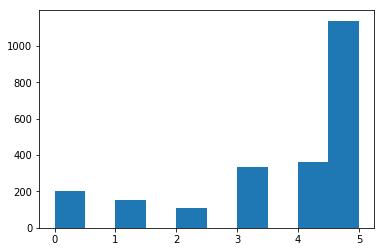

In [35]:
# GradientBoostingClassifier

def transform(ytrain):
    if ytrain < 20:
        return 0
    if ytrain < 40:
        return 1
    if ytrain < 60:
        return 2
    if ytrain < 80:
        return 3
    if ytrain < 100:
        return 4
    return 5


ytrainClassifier = [transform(i) for i in ytrain]
ytestClassifier = [transform(i) for i in ytest]
# ytestClassifier
# xtrain.shape,ytrain.shape
plt.hist(ytrainClassifier)

In [36]:
GBclassifier = GradientBoostingClassifier().fit(xtrain,ytrainClassifier)

yhatClassifier = GBclassifier.predict(xtrain)
yhatClassifier

array([5, 5, 3, ..., 0, 5, 5])

(array([ 44.,   0.,   6.,   0.,   1.,   0.,  18.,   0.,  13., 491.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

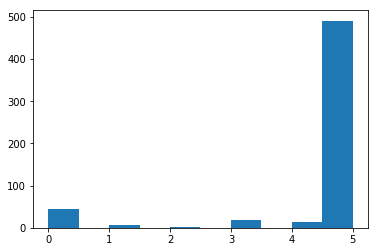

In [37]:
yhatClassifier = GBclassifier.predict(xtest)
accuracy_score(ytestClassifier, yhatClassifier)
plt.hist(yhatClassifier)

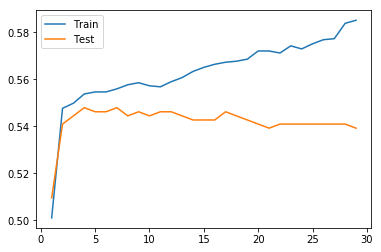

In [38]:
n_estimators = []
train_err = []
test_err = []

for n_estimator in range(1,30): #[1,2,3,4,5,10,20,50]:
    GBclassifier = GradientBoostingClassifier(n_estimators=n_estimator).fit(xtrain,ytrainClassifier)
    yhatClassifier = GBclassifier.predict(xtrain)
    n_estimators.append(n_estimator)
    train_err.append(accuracy_score(ytrainClassifier, yhatClassifier))
    test_err.append(accuracy_score(ytestClassifier, GBclassifier.predict(xtest)))
    
plt.plot(n_estimators, train_err, label="Train")
plt.plot(n_estimators, test_err, label="Test")
plt.legend()

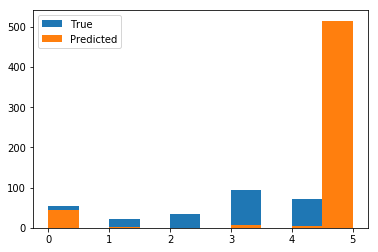

In [39]:
GBclassifier = GradientBoostingClassifier(n_estimators=20).fit(xtrain,ytrainClassifier)
plt.hist(ytestClassifier, label="True")
plt.hist(GBclassifier.predict(xtest), label="Predicted")
plt.legend()

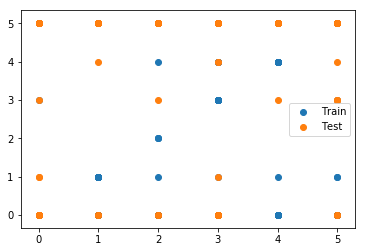

In [40]:
plt.scatter(ytrainClassifier, GBclassifier.predict(xtrain), label="Train")
plt.scatter(ytestClassifier, GBclassifier.predict(xtest), label="Test")
plt.legend()

In [41]:
# GradientBoostingRegressor

In [42]:
GBregressor = GradientBoostingRegressor().fit(xtrain,ytrain)
yhatRegressor = GBregressor.predict(xtrain)
yhatRegressor

array([86.84774392, 81.50407179, 79.98664038, ..., 28.55692741,
       87.20856683, 86.27153622])

In [43]:
yhatRegressor = GBregressor.predict(xtest)
mean_squared_error(ytest, yhatRegressor)

764.3622796425894

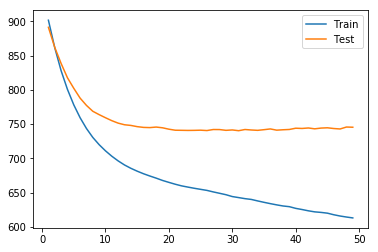

In [44]:
n_estimators = []
train_err = []
test_err = []

for n_estimator in range(1,50): #[1,2,3,4,5,10,20,50]:
    GBregressor = GradientBoostingRegressor(n_estimators=n_estimator).fit(xtrain,ytrain)
    yhatRegressor = GBregressor.predict(xtrain)
    n_estimators.append(n_estimator)
    train_err.append(mean_squared_error(ytrain, yhatRegressor))
    test_err.append(mean_squared_error(ytest, GBregressor.predict(xtest)))
    
plt.plot(n_estimators, train_err, label="Train")
plt.plot(n_estimators, test_err, label="Test")
plt.legend()

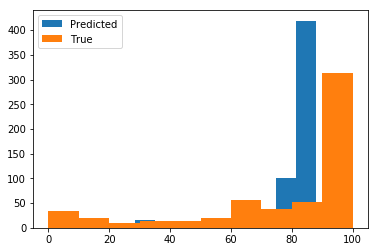

In [45]:
GBregressor = GradientBoostingRegressor(n_estimators=30).fit(xtrain,ytrain)
plt.hist(GBregressor.predict(xtest), label="Predicted")
plt.hist(ytest, label="True")
plt.legend()

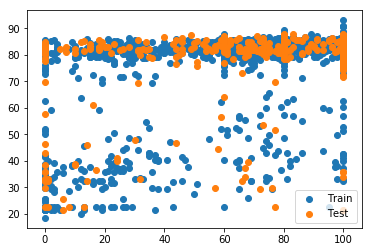

In [46]:
plt.scatter(ytrain, GBregressor.predict(xtrain), label="Train")
plt.scatter(ytest, GBregressor.predict(xtest), label="Test")
plt.legend()

In [47]:
# We finally look at 2 different Advanced Models that helps us visualize the data
# SVR
# MLPRegressor
# Before we begin with these Models, we need to format the data in a manner in which we can work with

In [48]:
# Imputer and formatting data
# Before we begin with these Models, we need to format the data in a manner in which we can work with, but this time, is a smarter manner using an Imputer to populate missing values for us
xmissing = dfclean[['jailprison' ,'Total number of calls',
'Total duration of calls',
'Total incoming calls',
'Total outgoing calls',
'Total number of missed calls',
'Total number of incoming calls, excluding missed',
'Proportion of incoming calls answered',
'Proportion of calls incoming',
'Duration of incoming calls',
'Duration of outgoing calls',
'Total number of night calls',
'Any night call',
'Number of incoming calls at night',
'Number of outgoing calls at night',
'Any night incoming call',
'Any night outgoing call',
'Min days between calls',
'Max days between calls',
'Total number of texts',
'Any night text',
'Number of texts at night',
'Min days between texts',
'Max days between texts']].values
# dfRawFilled = pandas.DataFrame(data=xdata)
imp = Imputer()
xdataimputed = imp.fit_transform(xmissing)
# imp.transform(dfRawFilled.values)
# dfRawFilled = pandas.DataFrame(data=(imp.transform(dfRawFilled.values)))
# dfRawFilled
xdataimputed

array([[0.00000000e+00, 6.00000000e+00, 2.61000000e+02, ...,
        1.20000000e+01, 1.00000000e+00, 4.00000000e+00],
       [0.00000000e+00, 2.00000000e+00, 2.58000000e+02, ...,
        0.00000000e+00, 3.90118577e+00, 1.30223979e+01],
       [0.00000000e+00, 2.00000000e+00, 4.82000000e+02, ...,
        0.00000000e+00, 3.90118577e+00, 1.30223979e+01],
       ...,
       [1.00000000e+00, 1.20000000e+01, 8.80000000e+02, ...,
        0.00000000e+00, 3.90118577e+00, 1.30223979e+01],
       [0.00000000e+00, 5.90000000e+01, 1.81330000e+04, ...,
        6.30000000e+01, 1.00000000e+00, 8.00000000e+00],
       [1.57648891e-01, 4.00000000e+01, 3.71700000e+03, ...,
        0.00000000e+00, 3.90118577e+00, 1.30223979e+01]])

In [49]:
xdataimputed.shape

(2869, 24)

In [50]:
# We implement a random 80/20 split of the data to be used for train/test
# namimg variables that will be used for training/testing
xtrain = xdataimputed[train_indices]
xtest = xdataimputed[test_indices]

# ravel creates 1d array
y = dfclean[['close']].values.ravel()
ytrain = y[train_indices]
ytest = y[test_indices]

In [51]:
# SVR

svr = SVR(kernel='rbf', C=1e1, epsilon=0.2)
svr.fit(xtrain, ytrain)
yhatsvr = svr.predict(xtest)
yhatsvr

array([ 91.4695275 ,  90.52525096,  91.47376533,  91.46952763,
        91.46952763,  91.46952771,  91.46952763,  91.46952763,
        91.46952763,  91.9575926 ,  91.4474016 ,  91.46952763,
        81.33604054,  91.46952763,  91.46759078,  91.46952763,
        91.46966253,  82.33515964,  89.9880676 ,  91.46952763,
        78.36831817,  91.46953853,  91.46949925,  91.46952763,
        91.46952763,  91.46952763,  90.09349678,  91.46952763,
        91.46940219,  99.26794822,  91.46952763,  98.60040047,
        91.46952763,  97.46948781,  91.46952763,  91.46952763,
        83.80532927,  91.35809623,  91.46952763,  91.46952763,
        91.46952763,  91.46952763,  92.899398  ,  88.83628451,
        91.46952763,  91.46952763,  91.46963402,  89.25387512,
        91.46952763,  91.46952763,  88.93041593,  91.4695276 ,
        91.44015373,  97.70579841,  91.46952763,  91.46684347,
        91.46952763,  91.46952769,  91.46952763,  91.46952763,
        91.46952763,  91.46952763,  91.46952763,  91.53

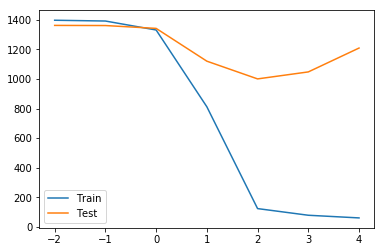

In [52]:
# NOT SURE WHERE THE ERROR HERE IS
lCs = []
train_err = []
test_err = []

for lC in range(-2,5): #[1,2,3,4,5,10,20,50]: range(1,30)
    svr = SVR(kernel='rbf', C=pow(10,lC)).fit(xtrain,ytrain)
    lCs.append(lC)
    train_err.append(mean_squared_error(ytrain, svr.predict(xtrain)))
    test_err.append(mean_squared_error(ytest, svr.predict(xtest)))
    
plt.plot(lCs, train_err, label="Train")
plt.plot(lCs, test_err, label="Test")
plt.legend()

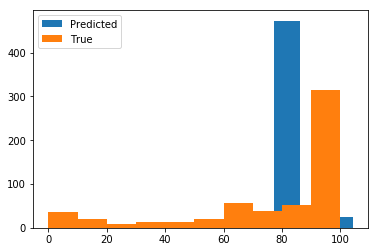

In [53]:
svr = SVR(kernel='rbf', C=1e2).fit(xtrain,ytrain)
plt.hist(svr.predict(xtest), label="Predicted")
plt.hist(ytest, label="True")
plt.legend()

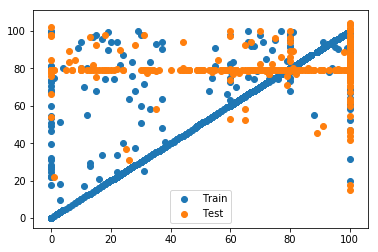

In [54]:
plt.scatter(ytrain, svr.predict(xtrain), label="Train")
plt.scatter(ytest, svr.predict(xtest), label="Test")
plt.legend()

In [55]:
# MLPRegressor
mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(5,2))
mlp.fit(xtrain, ytrain)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [56]:
yhat = mlp.predict(xtest)
mean_squared_error(ytest, mlp.predict(xtest))

934.3254380136968

(array([166., 330.,  60.,  14.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([75.51325311, 77.18512759, 78.85700207, 80.52887655, 82.20075103,
        83.87262551, 85.54449998, 87.21637446, 88.88824894, 90.56012342,
        92.2319979 ]),
 <a list of 10 Patch objects>)

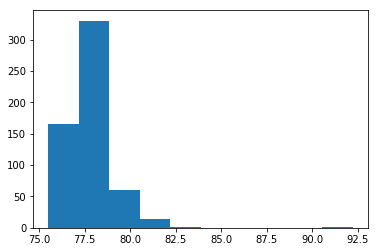

In [57]:
plt.hist(yhat)

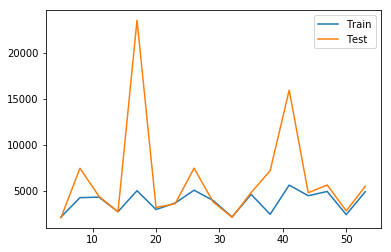

In [58]:
hs = []
train_err = []
test_err = []

for h in range(5,55,3): #[1,2,3,4,5,10,20,50]: range(1,30)
    mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(h,5))
    mlp.fit(xtrain, ytrain)
    hs.append(h)
    train_err.append(mean_squared_error(ytrain, mlp.predict(xtrain)))
    test_err.append(mean_squared_error(ytest, mlp.predict(xtest)))
    
plt.plot(hs, train_err, label="Train")
plt.plot(hs, test_err, label="Test")
plt.legend()

In [62]:
# We filter out the specific columns we are interested in

xdatafull = raw_data[['jailprison' ,'Total number of calls',
'Total duration of calls',
'Total incoming calls',
'Total outgoing calls',
'Total number of missed calls',
'Total number of incoming calls, excluding missed',
'Proportion of incoming calls answered',
'Proportion of calls incoming',
'Duration of incoming calls',
'Duration of outgoing calls',
'Total number of night calls',
'Any night call',
'Number of incoming calls at night',
'Number of outgoing calls at night',
'Any night incoming call',
'Any night outgoing call',
'Min days between calls',
'Max days between calls',
'Total number of texts',
'Any night text',
'Number of texts at night',
'Min days between texts',
'Max days between texts']].values

In [68]:
raw_data.shape

(18265, 36)

In [67]:
dfRawFilledFull = pandas.DataFrame(data=xdatafull)
print(dfRawFilledFull)

        0     1        2     3     4    5     6         7         8        9   \
0      NaN   NaN      NaN   NaN   NaN  NaN   NaN       NaN       NaN      NaN   
1      NaN  35.0    992.0  10.0  25.0  7.0   3.0  0.300000  0.285714     95.0   
2      0.0   5.0     85.0   3.0   2.0  1.0   2.0  0.666667  0.600000     29.0   
3      NaN   NaN      NaN   NaN   NaN  NaN   NaN       NaN       NaN      NaN   
4      NaN   2.0     64.0   1.0   1.0  1.0   0.0  0.000000  0.500000      0.0   
5      NaN   NaN      NaN   NaN   NaN  NaN   NaN       NaN       NaN      NaN   
6      NaN   NaN      NaN   NaN   NaN  NaN   NaN       NaN       NaN      NaN   
7      NaN   NaN      NaN   NaN   NaN  NaN   NaN       NaN       NaN      NaN   
8      NaN   NaN      NaN   NaN   NaN  NaN   NaN       NaN       NaN      NaN   
9      NaN   2.0     80.0   0.0   2.0  0.0   0.0  0.000000  0.000000      0.0   
10     NaN   NaN      NaN   NaN   NaN  NaN   NaN       NaN       NaN      NaN   
11     NaN   NaN      NaN   

In [61]:
imp = Imputer()
imp.fit(dfRawFilledFull)
imp.transform(dfRawFilledFull.values)
dfRawFilledFull = pandas.DataFrame(data=(imp.transform(dfRawFilledFull.values)))
dfRawFilledFull

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.157588,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,...,3.146068,0.253712,0.440573,4.717154,13.830781,32.000000,1.00000,17.000000,1.000000,4.000000
1,0.157588,35.00000,992.000000,10.000000,25.000000,7.000000,3.00000,0.300000,0.285714,95.00000,...,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.064367,12.305848
2,0.000000,5.00000,85.000000,3.000000,2.000000,1.000000,2.00000,0.666667,0.600000,29.00000,...,0.000000,0.000000,0.000000,4.717154,13.830781,4.000000,0.00000,0.000000,4.064367,12.305848
3,0.157588,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,...,3.146068,0.253712,0.440573,4.717154,13.830781,1.000000,1.00000,1.000000,4.064367,12.305848
4,0.157588,2.00000,64.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.500000,0.00000,...,1.000000,1.000000,1.000000,4.717154,13.830781,5.000000,1.00000,1.000000,2.000000,3.000000
5,0.157588,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,...,3.146068,0.253712,0.440573,4.717154,13.830781,1.000000,1.00000,1.000000,4.064367,12.305848
6,0.157588,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,...,3.146068,0.253712,0.440573,4.717154,13.830781,302.000000,1.00000,128.000000,1.000000,1.000000
7,0.157588,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,...,3.146068,0.253712,0.440573,4.717154,13.830781,1.000000,0.00000,0.000000,4.064367,12.305848
8,0.157588,13.73346,2020.834402,4.971283,8.762177,1.864043,3.10724,0.310244,0.269848,830.08459,...,3.146068,0.253712,0.440573,4.717154,13.830781,16.000000,1.00000,3.000000,1.000000,1.000000
9,0.157588,2.00000,80.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,...,2.000000,0.000000,1.000000,4.717154,13.830781,266.000000,1.00000,54.000000,1.000000,2.000000


In [65]:
# update x to use values that have been populated now
xdatafullColumns = dfRawFilledFull[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22, 23]].values

In [66]:
# debugging
xdatafullColumns.shape

(18265, 24)

In [ ]:
GBregressor = GradientBoostingRegressor().fit(xtrain,ytrain)
yhatRegressor = GBregressor.predict(xdatafullColumns)
yhatRegressor
# Do one last final predict on best results and feed out 
raw_data['Predicted Closeness'] = yhatRegressor
raw_data

In [ ]:
# Finally we write out the new dataFrame with the "Predicted Closeness" column

dfPredictions = raw_data.to_csv('Closeness_Predictions.csv', encoding="utf-8")